In [17]:
%matplotlib inline
%load_ext autoreload
%autoreload
import sys
sys.path.append('/Users/amitchell/Documents/GitHub/Soundscapy')
import soundscapy.ssid.database as isd
import pandas as pd
import janitor

lockdown = pd.read_csv("/Users/amitchell/OneDrive - University College London/_PhD/Papers - Drafts/J5_JASA_Lockdown-SS/results/Manuscript versions/Predicted Lockdown Data_2021-06-23_1.csv")
lockdown = isd.SurveyFrame(lockdown)
ssid = isd.load_isd_dataset(use_RecordID_as_index=False)
lockdown

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,GroupID,LocationID,Lockdown,ISOPleasant,ISOEventful,PA,N5,S,R,I,FS,T,LAeq,LA10_LA90,LCeq_LAeq,RA
0,CT501,CamdenTown,1,0.147083,0.129166,18.410488,18.10,1.56,0.0371,0.361,0.00700,0.175,59.44,12.32,9.35,11.70
1,CT502,CamdenTown,1,-0.016337,0.317644,37.721660,35.20,1.92,0.0387,0.339,0.00656,0.287,69.67,15.15,7.19,12.90
2,CT503,CamdenTown,1,-0.020515,0.356937,40.301608,37.70,1.91,0.0428,0.370,0.01390,0.181,72.93,21.23,6.32,15.50
3,CT504,CamdenTown,1,0.102655,0.143957,20.047791,19.60,1.79,0.0318,0.462,0.01820,0.177,62.28,8.99,7.76,12.80
4,CT505,CamdenTown,1,0.000870,0.292147,37.685220,35.70,1.88,0.0355,0.340,0.01140,0.267,68.39,17.59,6.55,12.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,TS537,TorringtonSq,1,0.206407,-0.001379,9.987229,9.82,1.44,0.0288,0.399,0.00550,0.203,52.90,5.61,12.97,10.80
567,TS538,TorringtonSq,1,0.141290,0.104134,14.359218,14.10,1.40,0.0344,0.359,0.00916,0.230,56.30,10.09,9.27,9.99
568,TS539,TorringtonSq,1,0.086035,0.260920,30.033977,29.40,1.57,0.0573,0.363,0.00967,0.481,64.32,14.80,13.95,10.90
569,TS540,TorringtonSq,1,0.212120,-0.048859,7.882057,7.74,1.38,0.0258,0.445,0.00902,0.257,49.33,2.64,12.12,9.62


In [53]:
filter_ssid = ssid[['GroupID', 'LocationID', 'ISOPleasant', 'ISOEventful', 'Lockdown']].filter_lockdown(False)
filter_lockdown = lockdown[['GroupID', 'LocationID', 'ISOPleasant', 'ISOEventful', 'Lockdown']]
new_sf = filter_ssid.append(filter_lockdown).reset_index()
new_sf = isd.SurveyFrame(new_sf)
new_sf

,index,GroupID,LocationID,ISOPleasant,ISOEventful,Lockdown
0,0,CT101,CamdenTown,-0.219700,0.426800,0
1,1,CT101,CamdenTown,-0.469700,0.176800,0
2,2,CT101,CamdenTown,0.000000,0.250000,0
3,3,CT102,CamdenTown,0.103600,-0.750000,0
4,4,CT103,CamdenTown,0.250000,0.750000,0
...,...,...,...,...,...,...
1904,566,TS537,TorringtonSq,0.206407,-0.001379,1
1905,567,TS538,TorringtonSq,0.141290,0.104134,1
1906,568,TS539,TorringtonSq,0.086035,0.260920,1
1907,569,TS540,TorringtonSq,0.212120,-0.048859,1


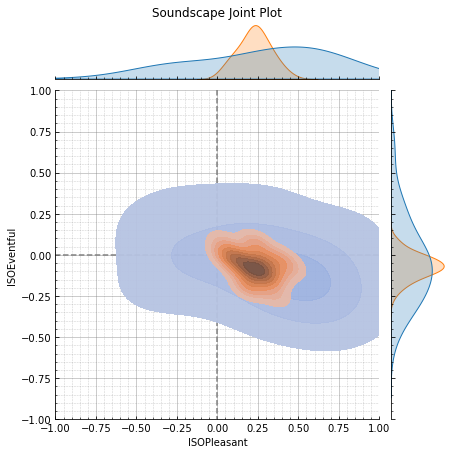

In [54]:
new_sf.filter_location_ids(['MarchmontGarden']).circumplex_jointplot(group='Lockdown', palette='deep')